In [3]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as mp 
%matplotlib inline
import seaborn as sn

In [4]:
df = pn.read_csv('offline orders.csv.csv', encoding='unicode_escape')

In [5]:
df.shape

(15, 8)

In [6]:
df.head()

,Timestamp,POC (Filler's name),Customer Name,Product Ordered,Pitched Price,Estimated Delivery Date,Color,Products
0,3/27/2023 20:47:32,Subhranil Sarkar,Priyam Biswas,Batarang,69,3/28/2023,Black,Batarang
1,3/28/2023 18:23:23,Rounak Banerjee,Abhirup basu,Iron man helmet keychain,79,04-01-2023,Red yellow,Keychain
2,3/28/2023 23:29:45,Rounak Banerjee,Yashmin khatun,Survey cops logo badge,96,04-08-2023,blue and white,Badge/logo
3,3/30/2023 16:17:07,Rounak Banerjee,Siddhartha Das ( Kolkata),"Bale Batarang, Robert Pattinson batarang, ben ...",408,04-09-2023,Black,Batarang
4,3/30/2023 16:20:27,Rounak Banerjee,Sourav nandy ( Kolkata),Batfleck Batarang,90,04-11-2023,Black,Batarang


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Timestamp                15 non-null     object
 1   POC (Filler's name)      15 non-null     object
 2   Customer Name            15 non-null     object
 3   Product Ordered          15 non-null     object
 4   Pitched Price            15 non-null     int64 
 5   Estimated Delivery Date  15 non-null     object
 6   Color                    15 non-null     object
 7   Products                 15 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


In [8]:
pn.isnull(df).sum()

Timestamp                  0
POC (Filler's name)        0
Customer Name              0
Product Ordered            0
Pitched Price              0
Estimated Delivery Date    0
Color                      0
Products                   0
dtype: int64

In [9]:
df['Timestamp'].dtypes

dtype('O')

In [10]:
df.columns

Index(['Timestamp', 'POC (Filler's name)', 'Customer Name', 'Product Ordered',
       'Pitched Price', 'Estimated Delivery Date', 'Color', 'Products'],
      dtype='object')

In [11]:
df.rename(columns ={'Estimated Delivery Date': 'Delivery date'}, inplace=True)

In [12]:
df.columns

Index(['Timestamp', 'POC (Filler's name)', 'Customer Name', 'Product Ordered',
       'Pitched Price', 'Delivery date', 'Color', 'Products'],
      dtype='object')

In [13]:
df[['Pitched Price']].describe()

,Pitched Price
count,15.000000
mean,331.933333
std,279.539281
min,69.000000
25%,93.000000
50%,300.000000
75%,389.000000
max,950.000000


In [14]:
df.columns

Index(['Timestamp', 'POC (Filler's name)', 'Customer Name', 'Product Ordered',
       'Pitched Price', 'Delivery date', 'Color', 'Products'],
      dtype='object')

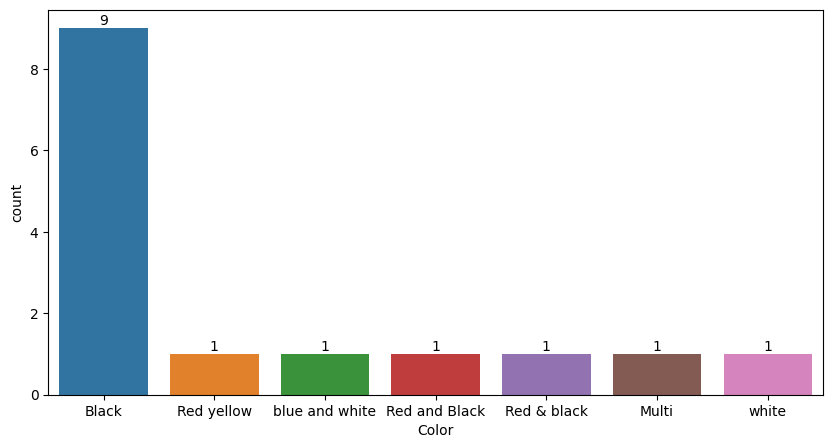

In [15]:
fig1 ,ax1 = mp.subplots(figsize=(10,5))
cl = sn.countplot(x= 'Color', data = df)
for bars in cl.containers:
    cl.bar_label(bars)

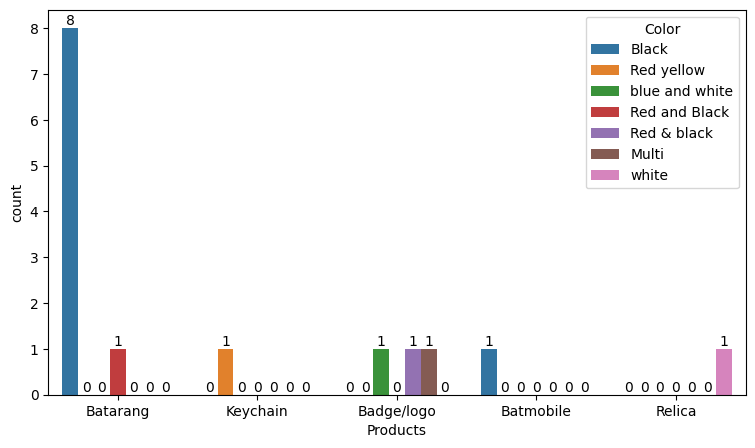

In [16]:
fig1 ,ax1 = mp.subplots(figsize=(9,5))
ov = sn.countplot(x='Products',data =df , hue ='Color')
for bars in ov.containers:
    ov.bar_label(bars)

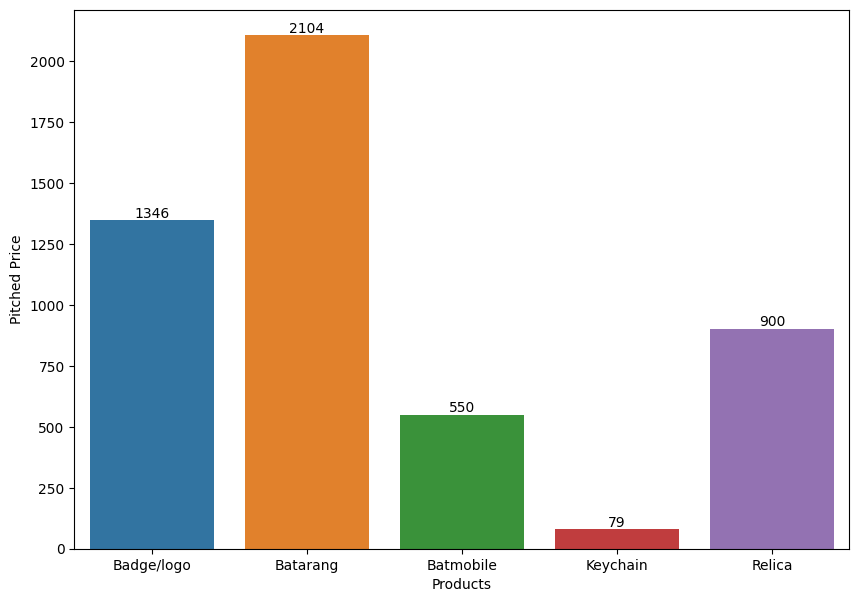

In [17]:
fig1 ,ax1 = mp.subplots(figsize=(10,7))
sales_product = df.groupby(['Products'], as_index=False)['Pitched Price'].sum()#.sort_values(by='Pitched Price',ascending=False)

ad = sn.barplot(x='Products',y='Pitched Price',data=sales_product)

for bars in ad.containers:
    ad.bar_label(bars)
    

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            15 non-null     object
 1   POC (Filler's name)  15 non-null     object
 2   Customer Name        15 non-null     object
 3   Product Ordered      15 non-null     object
 4   Pitched Price        15 non-null     int64 
 5   Delivery date        15 non-null     object
 6   Color                15 non-null     object
 7   Products             15 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


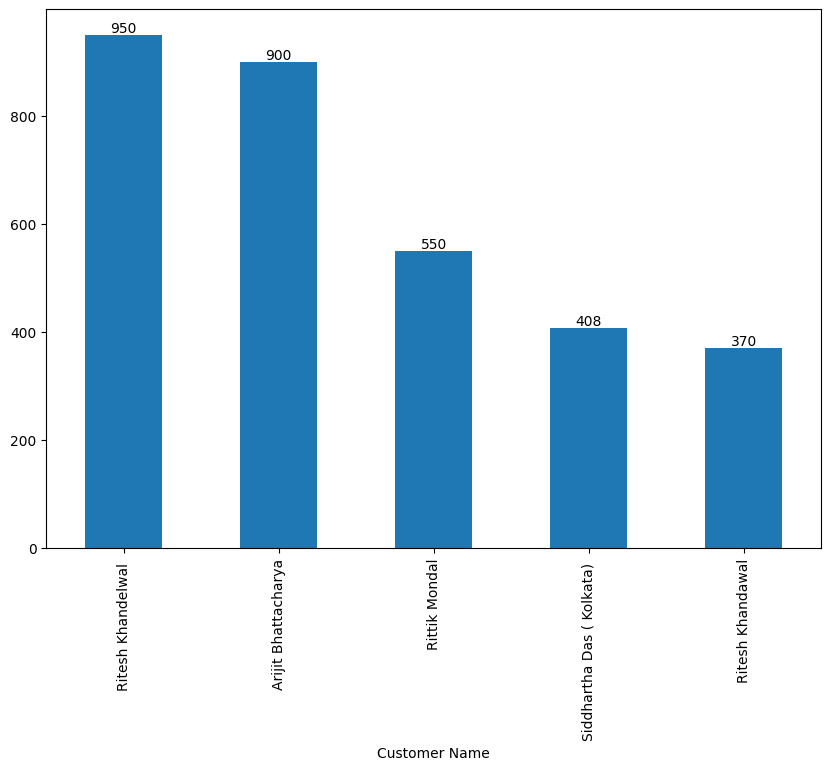

In [19]:
fig1 ,ax1 = mp.subplots(figsize=(10,7))
ac= df.groupby('Customer Name')['Pitched Price'].sum().nlargest(5).plot(kind='bar')
for bars in ac.containers:
    ac.bar_label(bars)